In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def c_pdd(rho):
    c = 0
    for i in np.diag(rho):
        for j in np.diag(rho):
            c += abs(i-j)
    c /= (2*np.diag(rho).shape[0]-2)
    c = 1 - c
    return c


def von_neumann_entropy(rho):
    # Calculate eigenvalues of the density matrix
    eigenvalues = np.linalg.eigvals(rho)
    
    # Filter out non-positive eigenvalues to avoid log issues
    eigenvalues = eigenvalues[eigenvalues > 0]
    
    # Calculate the von Neumann entropy
    entropy = -np.sum(eigenvalues * np.log(eigenvalues))
    
    return entropy

def relative_entropy_of_coherence(rho):
    # Calculate the diagonal part of the density matrix
    rho_diag = np.diag(np.diag(rho))
    
    # Calculate the von Neumann entropy of the original density matrix
    S_rho = von_neumann_entropy(rho)
    
    # Calculate the von Neumann entropy of the diagonal density matrix
    S_rho_diag = von_neumann_entropy(rho_diag)
    
    # The relative entropy of coherence
    C_rel_ent = S_rho_diag - S_rho
    C_rel_ent /= np.log(rho.shape[0])
       
    return C_rel_ent


def l1_norm_of_coherence(rho):
    """Calculates the normalized L1 norm of coherence for a given density matrix.
    
    Args:
        rho (np.ndarray): The density matrix (NxN).
    
    Returns:
        float: The normalized L1 norm of coherence.
    """
    # Ensure the density matrix is square
    assert rho.shape[0] == rho.shape[1], "Density matrix must be square"
    
    # Dimension of the density matrix
    N = rho.shape[0]
    
    # Calculate the sum of absolute values of the off-diagonal elements
    raw_coherence = np.sum(np.abs(rho)) - np.sum(np.abs(np.diag(rho)))
    
    # Normalize the coherence
    normalized_coherence = raw_coherence / (N - 1)
    
    return normalized_coherence

In [3]:
H_non_interacting = np.array([
    [0,1,1,0],
    [1,0,0,1],
    [1,0,0,1],
    [0,1,1,0]], dtype = complex
)

H_interacting = np.array([
    [0,0,0,1],
    [0,0,1,0],
    [0,1,0,0],
    [1,0,0,0]], dtype = complex
)

# H = H/np.linalg.det(H)

p = np.array([
    [1,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]], dtype = complex
)

# p = np.array([
#     [0.25,0.25,0.25,0.25],
#     [0.25,0.25,0.25,0.25],
#     [0.25,0.25,0.25,0.25],
#     [0.25,0.25,0.25,0.25]], dtype = complex
# )

# p = p/np.linalg.det(p)


def evolve_density_matrix(H, rho, dt, steps):
    """Evolves the density matrix using the Liouville-von Neumann equation.
    
    Args:
        H (np.ndarray): The Hamiltonian matrix (4x4).
        rho (np.ndarray): The initial density matrix (4x4).
        dt (float): The time step for evolution.
        steps (int): The number of steps to evolve the system.
    
    Returns:
        np.ndarray: The evolved density matrix after the specified number of steps.
    """
    rho = np.array([
        [1,0,0,0],
        [0,0,0,0],
        [0,0,0,0],
        [0,0,0,0]], dtype = complex
    )

    hbar = 1.0  # Use natural units where ħ = 1
    
    # List to store the diagonal elements at each step
    # Initialize a NumPy array to store diagonal elements at each step
    diagonal_elements = np.zeros((steps + 1, rho.shape[0]), dtype=float)
    C_pdd = np.zeros(steps + 1, dtype=float)
    C_l1 = np.zeros(steps + 1, dtype=float)
    C_re = np.zeros(steps + 1, dtype=float)
    
    t = np.linspace(0, steps, steps+1)
    
    for step in range(steps):
        # Store the diagonal elements of the current density matrix
        diagonal_elements[step] = abs(np.diag(rho))
        diagonal_elements[step] /= sum(diagonal_elements[step])

        C_pdd[step] = c_pdd(rho)
        C_l1[step] = l1_norm_of_coherence(rho)
        C_re[step] = relative_entropy_of_coherence(rho)
        
        # Calculate the commutator [H, rho]
        commutator = np.dot(H, rho) - np.dot(rho, H)
        
        # Update the density matrix using the Liouville-von Neumann equation
        rho += (-1j * dt  * commutator / hbar)
        rho /= np.trace(rho)
        
    x = diagonal_elements.transpose()

    plt.figure(figsize=(10, 6))
    # First four scatter plots with low visibility
    plt.plot(t, x[0], linestyle='--', linewidth=0.5, label='00')
    plt.plot(t, x[1], linestyle='--', linewidth=0.5, label='01')
    plt.plot(t, x[2], linestyle='-.', linewidth=0.5, label='10')
    plt.plot(t, x[3], linestyle=':', linewidth=0.5, label='11')
    plt.plot(t, C_pdd, linestyle='-', linewidth=1.5, label='C_pdd') 
    plt.plot(t, C_re, linestyle='-', linewidth=1.5, label='C_re')   
    plt.plot(t, C_l1, linestyle='-', linewidth=1.5, label='C_l1') 
    # plt.legend()
    plt.show()
    # plt.scatter(t, x[0], marker = '+')
    # plt.show()
    # plt.scatter(t, x[1])
    # plt.show()
    # plt.scatter(t, x[2])
    # plt.show()
    # plt.scatter(t, x[3])
    # plt.show()
    
    return diagonal_elements

# diagonal_elements = evolve_density_matrix(H_non_interacting, p, 0.0001, 50000)
# diagonal_elements = evolve_density_matrix(H_interacting, p, 0.0001, 50000)

# print(p)
# print(diagonal_elements)

C:\Users\91953\AppData\Local\Temp\ipykernel_6044\206806584.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  C_re[step] = relative_entropy_of_coherence(rho)


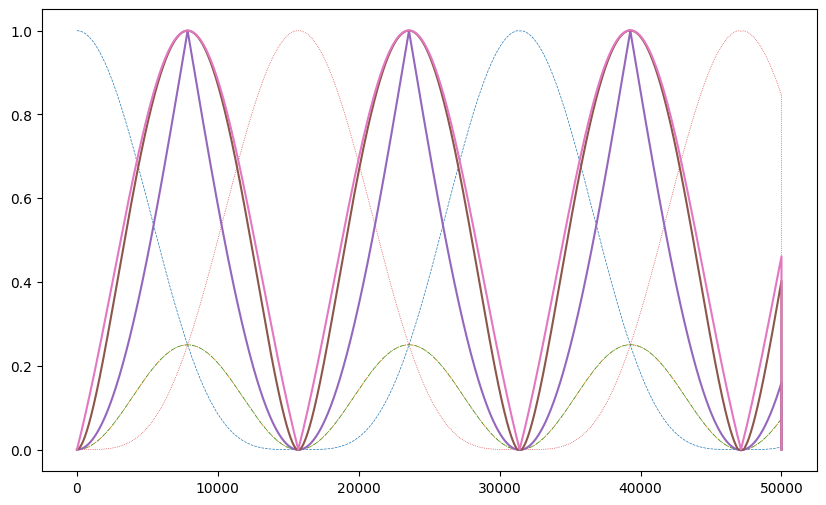

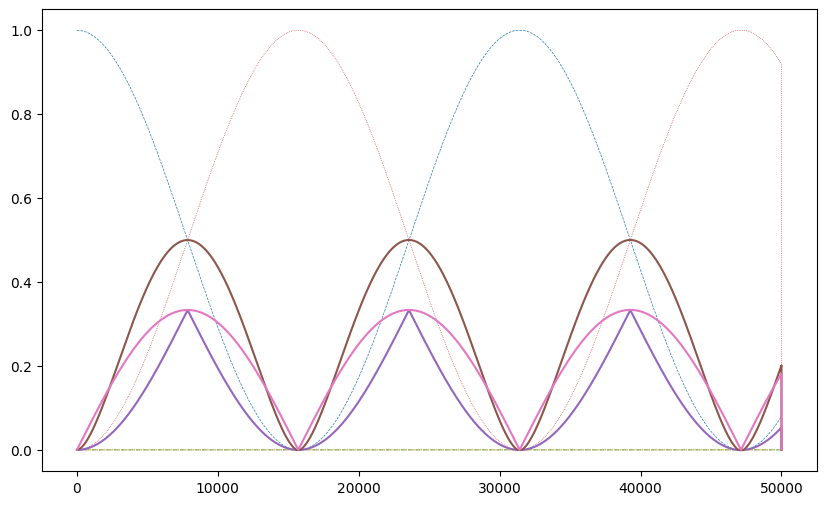

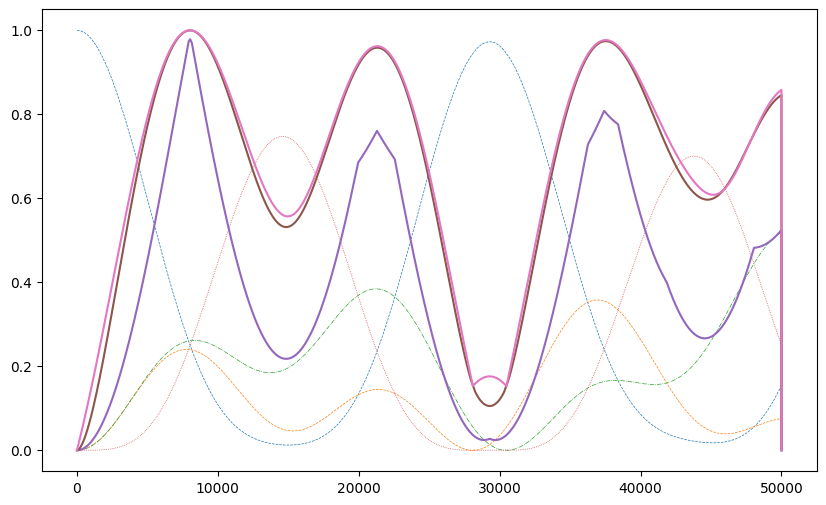

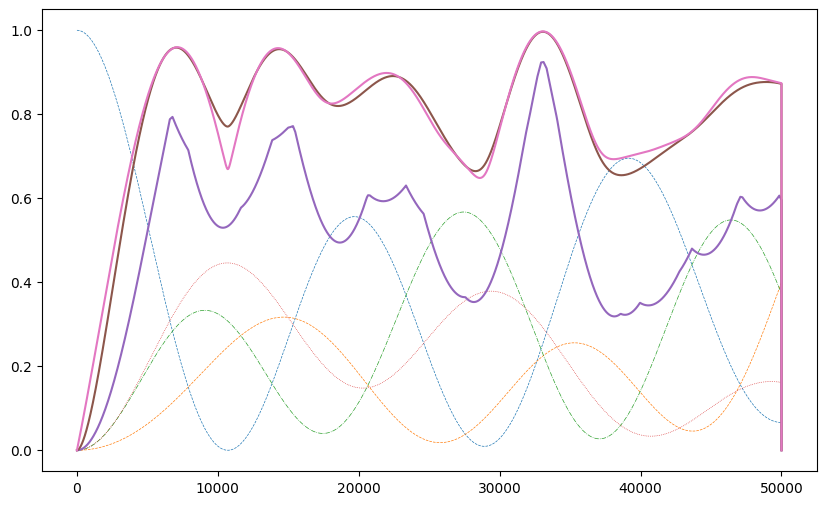

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999955e-01, 5.00000000e-09, 2.00000000e-08, 2.00000000e-08],
       ...,
       [6.60674029e-02, 3.99849054e-01, 3.72548821e-01, 1.61534723e-01],
       [6.60669380e-02, 3.99942012e-01, 3.72462179e-01, 1.61528871e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [6]:
def interacting_Hamiltonian(H1, H2):
    return np.kron(H2, H1)

def non_interacting_Hamiltonian(H1, H2):
    return np.kron(H2, np.eye(H1.shape[0])) + np.kron(np.eye(H2.shape[0]), H1)

def Hamiltonian(delta):
    return np.array([
        [delta, 1],
        [1, 0]], dtype = complex
    )


H1 = Hamiltonian(0)
 
evolve_density_matrix(non_interacting_Hamiltonian(H1,H1), p, 0.0001, 50000)
evolve_density_matrix(interacting_Hamiltonian(H1,H1), p, 0.0001, 50000)


H1 = Hamiltonian(1)
H2 = Hamiltonian(0.5)
 
evolve_density_matrix(non_interacting_Hamiltonian(H1,H2), p, 0.0001, 50000)
evolve_density_matrix(interacting_Hamiltonian(H1,H2), p, 0.0001, 50000)